# Proyecto de Día 11 - Análisis Predictivo para una Tienda Minorista

### Objetivo
Tu tarea consiste en desarrollar un **modelo predictivo** para una **tienda minorista** que desea pronosticar las ventas basándose en diversas características. La tienda ha estado recopilando datos sobre las ventas diarias y quiere utilizar esta información para tomar decisiones informadas sobre la *gestión de inventario*, *promociones* y *programación de personal*.

Tu objetivo es construir un modelo que pueda **predecir el total de ventas para el próximo mes**, utilizando datos de los meses anteriores.

### Tarea
**1. Preparación de Datos**
- Carga el conjunto de datos y realiza cualquier preprocesamiento necesario, como manejar **valores faltantes**, selección de **variables dependientes e independientes**, y dividir los datos en **conjuntos de entrenamiento** y **prueba**.


**2. Análisis Exploratorio de Datos (EDA)**
- Realiza un EDA para entender la distribución de las ventas y la relación entre las ventas y otras características. Esto podría incluir trazar las ventas a lo largo del tiempo, analizar las ventas en *festivos* vs. *no festivos* y el impacto de las promociones.

**3. Selección de Modelo**
- Utiliza el conocimiento que has adquirido sobre diferentes algoritmos para elegir el modelo más adecuado para esta tarea. Considera la **Regresión Lineal**, los **Árboles de Decisión**, y los **Bosques Aleatorios**.

**4. Entrenamiento y Evaluación del Modelo**
- Entrena tu modelo seleccionado en el conjunto de entrenamiento y evalúa su rendimiento utilizando el conjunto de prueba. Utiliza gráficos para visualizar las *ventas reales* vs. *las predichas*.

**5. Conclusión**

- Basado en los resultados iniciales, resume tus hallazgos y realiza recomendaciones para la tienda minorista sobre cómo utilizar el análisis predictivo para una mejor toma de decisiones.


### Nota
* Enfócate en la claridad y simplicidad de tu código.

¡Mucha Suerte!

**0. Importación de Bibliotecas**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

**1. Preparación de Datos**

In [2]:
#Importación de datos desde un aarchivo csv:

ruta = r"C:\Users\Francisco\OneDrive\Documentos\Cursos\Udemy\Python\Día 11\Cuadernos para Prácticas\Ventas.csv"

df = pd.read_csv(ruta)
df

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484
...,...,...,...,...,...
360,2022-12-27,2,1,0,2189
361,2022-12-28,3,0,0,2548
362,2022-12-29,4,0,0,3018
363,2022-12-30,5,0,0,3591


In [3]:
# Vemos el tipo de datos que tenemos en nuestro DF:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha          365 non-null    object
 1   DíaDeLaSemana  365 non-null    int64 
 2   Promociones    365 non-null    int64 
 3   Festivo        365 non-null    int64 
 4   Ventas         365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.4+ KB


In [4]:
# Convertimos el tipo de dato de la serie Fecha a datetime:

df['Fecha'] = pd.to_datetime(df['Fecha'])
df.head()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484


In [5]:
# Para preparar mejor los datos, podemos normalizar los días de la semana para llevar todos estos datos a escala de 0 y 1

# Separamos las columnas que no deseamos normalizar, ventas y fecha, pero sin eliminarlas del df; las guardamos como una lista de 
# columnas para la normalización:
columnas_a_escalar = df.drop(["Ventas", "Fecha"], axis=1).columns

# Normalizamos los datos en escala de 0-1:
escala = MinMaxScaler(feature_range=(0, 1))
normal = escala.fit_transform(df[columnas_a_escalar])
df_normal = pd.DataFrame(data=normal, columns=columnas_a_escalar)

# Agregamos las columnas 'Ventas' y'Fecha' al nuevo df normalizado:
df_normal["Ventas"] = df["Ventas"]
df_normal["Fecha"] = df["Fecha"]
df_normal.head()

,DíaDeLaSemana,Promociones,Festivo,Ventas,Fecha
0,0.833333,0.0,0.0,4033,2022-01-01
1,1.000000,0.0,1.0,4012,2022-01-02
2,0.000000,0.0,0.0,1608,2022-01-03
3,0.166667,1.0,0.0,2046,2022-01-04
4,0.333333,0.0,0.0,2484,2022-01-05


In [6]:
# Comprobamos el tipo de datos final del nuevo df:

df_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DíaDeLaSemana  365 non-null    float64       
 1   Promociones    365 non-null    float64       
 2   Festivo        365 non-null    float64       
 3   Ventas         365 non-null    int64         
 4   Fecha          365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 14.4 KB


In [7]:
# Determinamos la dependencia de variables:

# Las variables independientes serán los días de la semana, las promociones y los días festivos:
X = df_normal.drop(['Ventas', 'Fecha'], axis=1)

# La variable dependiente de interés será 'Ventas':
y = df_normal['Ventas']

In [8]:
# Definimos los conjuntos de entrenamiento y prueba con train_test_split:

X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, train_size=.8, random_state=42)

**2. Análisis Exploratorio de Datos (EDA)**

In [9]:
df.describe()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
count,365,365.000000,365.000000,365.000000,365.000000
mean,2022-07-01 23:59:59.999999744,4.005479,0.200000,0.142466,2997.219178
min,2022-01-01 00:00:00,1.000000,0.000000,0.000000,1305.000000
25%,2022-04-02 00:00:00,2.000000,0.000000,0.000000,2195.000000
50%,2022-07-02 00:00:00,4.000000,0.000000,0.000000,3074.000000
75%,2022-10-01 00:00:00,6.000000,0.000000,0.000000,3979.000000
max,2022-12-31 00:00:00,7.000000,1.000000,1.000000,4404.000000
std,NaN,2.002738,0.400549,0.350007,942.096284


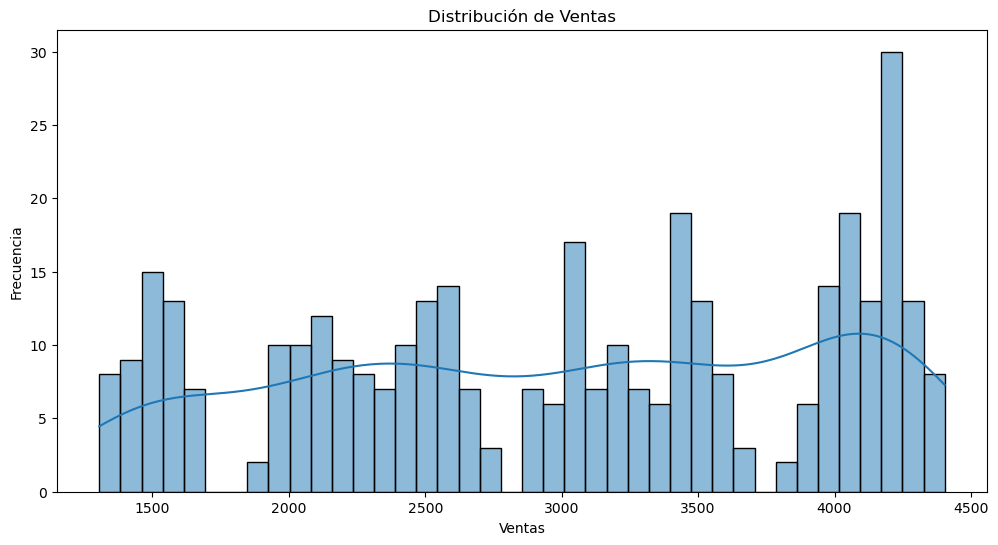

In [10]:
# Visualización de la distribución de ventas

plt.figure(figsize=(12, 6))
sns.histplot(x=df['Ventas'], kde=True, bins=40)
plt.title('Distribución de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia');

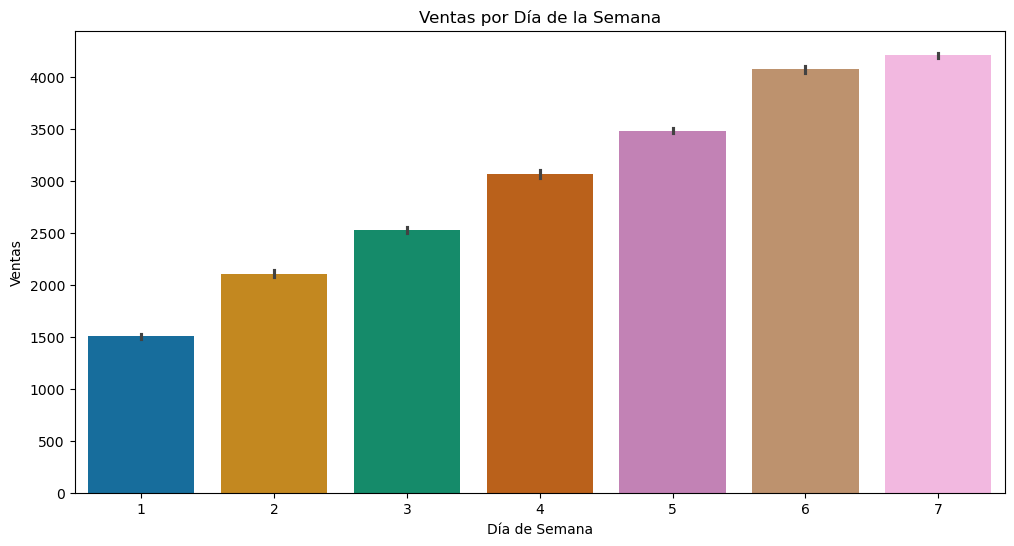

In [11]:
# Visualización de las ventas por día de la semana:

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='DíaDeLaSemana', y='Ventas', hue='DíaDeLaSemana', palette='colorblind', legend=False)
plt.title('Ventas por Día de la Semana')
plt.xlabel('Día de Semana')
plt.ylabel('Ventas');

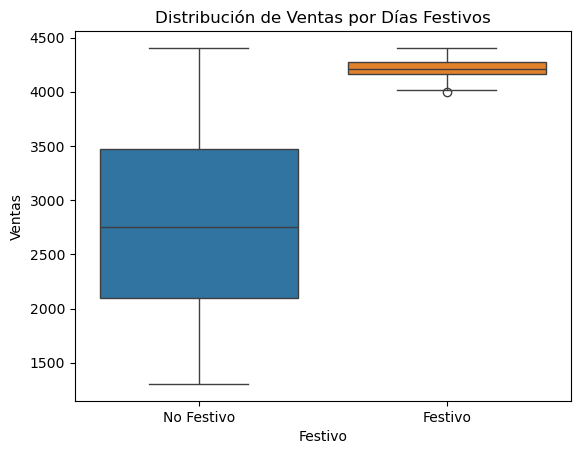

In [12]:
# Comparación de Ventas en días Festivos y No Festivos


sns.boxplot(data=df, x='Festivo', y='Ventas', hue='Festivo', legend=False)
plt.xticks([0, 1], ['No Festivo', 'Festivo'])
plt.title("Distribución de Ventas por Días Festivos");

C:\Users\Francisco\AppData\Local\Temp\ipykernel_6068\3729086468.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='Promociones', y='Ventas', jitter=True, palette='Set2')


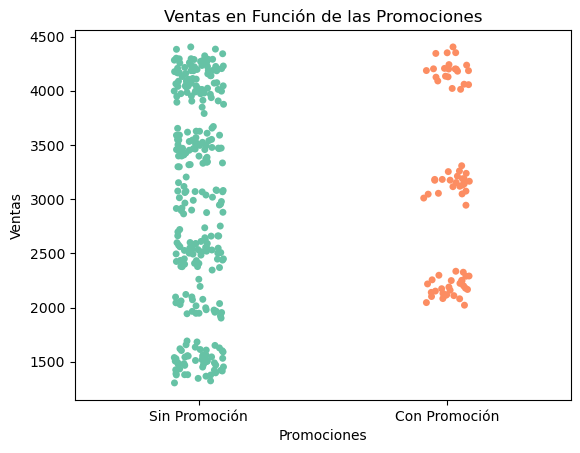

In [13]:
# Efecto de las promociones en las Ventas

sns.stripplot(data=df, x='Promociones', y='Ventas', jitter=True, palette='Set2')
plt.xticks([0, 1], ['Sin Promoción', 'Con Promoción'])
plt.title("Ventas en Función de las Promociones");

C:\Users\Francisco\AppData\Local\Temp\ipykernel_6068\1754934509.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Festivo_Promocion', y='Ventas', palette='pastel')


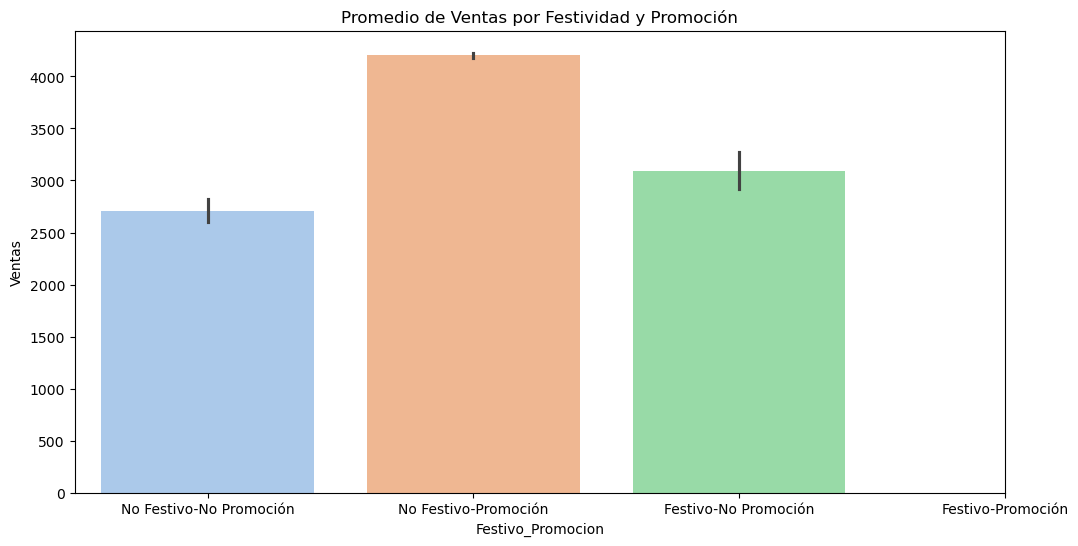

In [14]:
# Distribución conjunta de ventas según días festivos y promociones

# Crear una columna combinada para días festivos y promociones
df['Festivo_Promocion'] = df['Festivo'].astype(str) + '-' + df['Promociones'].astype(str)

# Barplot para el promedio de ventas por combinación

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Festivo_Promocion', y='Ventas', palette='pastel')
plt.xticks([0, 1, 2, 3], ['No Festivo-No Promoción', 'No Festivo-Promoción', 
                          'Festivo-No Promoción', 'Festivo-Promoción'])
plt.title("Promedio de Ventas por Festividad y Promoción");

**3. Selección de Modelo**

In [15]:
modelos = [
    ("Regresión Lineal", LinearRegression()),
    ("Árbol de Decisión", DecisionTreeRegressor(random_state=42)),
    ("Bosques Aleatorios", RandomForestRegressor(random_state=42))
]

In [16]:
for n, modelo in modelos:
    modelo.fit(X_entrena, y_entrena)
    score = modelo.score(X_prueba, y_prueba)
    print(f"{n}: {score:.5f}")

Regresión Lineal: 0.99242
Árbol de Decisión: 0.99235
Bosques Aleatorios: 0.99231


En base a los resultados obtenidos, utilizamos el método de Regresión Lineal como algoritmo para predecir resultados futuros.

**4. Entrenamiento y Evaluación del Modelo**

In [17]:
# Alojamos el modelo de Regresión Lineal en una variable

modelo_lineal = LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento
modelo_lineal.fit(X_entrena, y_entrena)

# Realizamos predicciones usando el conjunto de prueba
predict = modelo_lineal.predict(X_prueba)

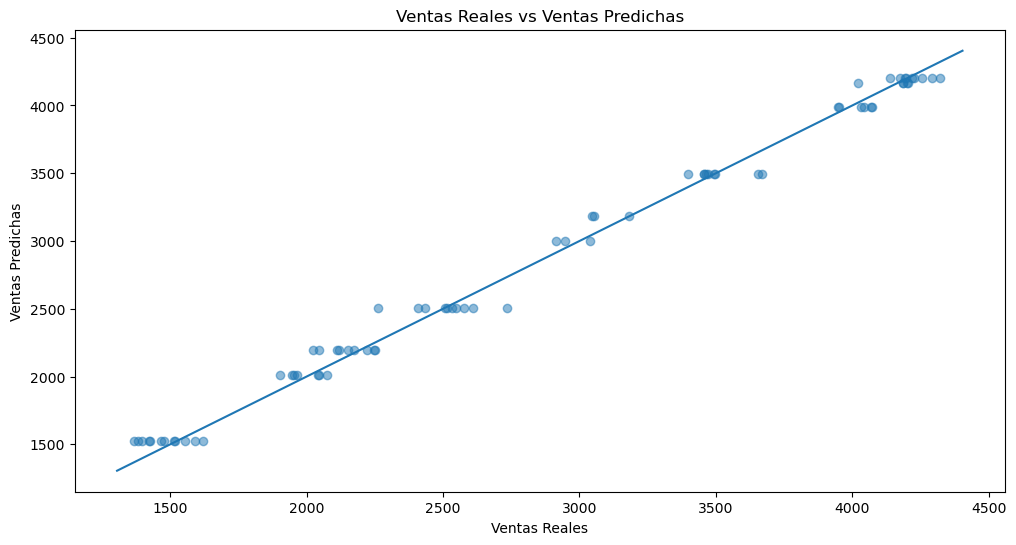

In [18]:
# Graficamos las Ventas Reales (y_prueba) vs. Ventas Predichas

plt.figure(figsize=(12, 6))
plt.scatter(y_prueba, predict, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predichas')
plt.title('Ventas Reales vs Ventas Predichas');

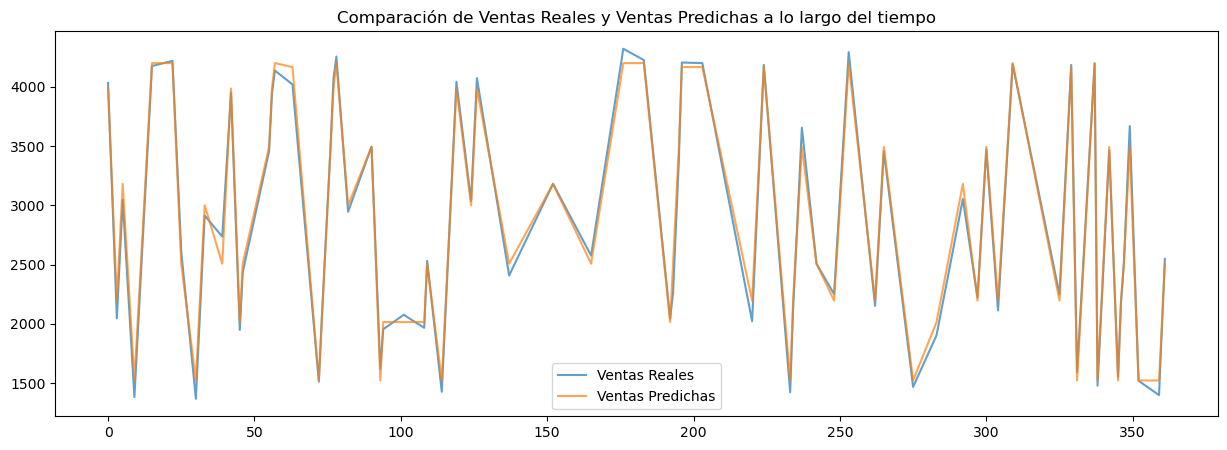

In [19]:
# Podemos crear un nuevo DataFrame de contraste para comparar las ventas reales y predichas a lo largo del tiempo:

df_test = pd.DataFrame({'Real': y_prueba, 'Predicho': predict})
df_test = df_test.sort_index()

# Graficamos estos datos:

plt.figure(figsize=(15, 5))
plt.plot(df_test['Real'], label='Ventas Reales', alpha=0.7)
plt.plot(df_test['Predicho'], label='Ventas Predichas', alpha=0.7)
plt.legend()
plt.title('Comparación de Ventas Reales y Ventas Predichas a lo largo del tiempo');

**5. Conclusión**

1. El primer gráfico, que muestra un diagrama de dispersión de las Ventas Reales vs Ventas Predichas, sugiere que el modelo de regresión lineal está haciendo un buen trabajo al predecir las ventas. La línea de tendencia indica una fuerte relación positiva entre los valores reales y predichos, lo que es un signo prometedor de que el modelo puede capturar la tendencia de las ventas con eficacia.
2. El segundo gráfico compara las Ventas Reales y las Ventas Predichas a lo largo del tiempo y también parece seguir un patrón similar, aunque hay algunos puntos en los que las predicciones y los valores reales difieren significativamente. Esto puede deberse a eventos no capturados por las variables en el modelo o a variaciones naturales en las ventas que no son predecibles.

Algunas recomendaciones para la tienda minorista:
* Optimización de Inventario: Pueden utilizar las predicciones para gestionar mejor el inventario. Las fechas festivas pueden requerir un stock adicional para evitar la falta de productos.
* Planificación de Personal: Ajustar los horarios del personal según días festivos, y no necesariamente según días de promociones. 
* Marketing Dirigido: Si identifican patrones respecto a cuándo las ventas son más fuertes, pueden dirigir las campañas de marketing para esos períodos y potencialmente aumentar aún más las ventas.
* Análisis de Anomalías: Investigar aquellos puntos donde hay grandes desviaciones entre las ventas reales y las predichas para entender mejor los factores no capturados por el modelo.
* Mejoras en el Modelo: Considerar incluir más variables en el modelo que puedan afectar las ventas, como datos económicos generales, eventos locales, competencia, o incluso el clima, etc.